## Генерация нотной грамоты для пианино по мелодии

Ссылка на датасет `https://drive.google.com/drive/folders/1605Vh_DNXQ44J7qkzN8HvLe-c6naCPfM?usp=sharing` 

Датасет (~/data) содержит 10 записей звуков различных пианино - отдельных нот/клавиш, таблица источников и названий инструментов представлена в Таблице - 1. В датасете представлено 6 записей полноценных пианино с качеством CD (16-bit, 44-kHz). Часть записей собиралась вручную. 

In [2]:
import pandas as pd
import os

data_folder = "~/data"
files_portraits = os.listdir(data_folder) 
df = pd.DataFrame(files_portraits, columns=['Название пакета семплов'])

new_column = {
    'Название пианино': ['Hybrid', 'Piano', 'Steinway & Sons model B', 'Steinway D', 'Steingraeber 130 (upright)', 'Concert Grand D', 'Piano', 'Boesendorfer 290 Imperial', 'Piano', 'Yamaha Disklavier Mark III (upright)'],
    'Источник данных': ['ADASP - https://amubox.univ-amu.fr/index.php/s/iNG0xc5Td1Nv4rR?', 'Online Pianist - https://www.onlinepianist.com/', 'EMS University - https://theremin.music.uiowa.edu/MISpiano.html', 'ADASP - https://amubox.univ-amu.fr/index.php/s/iNG0xc5Td1Nv4rR?', 'ADASP - https://amubox.univ-amu.fr/index.php/s/iNG0xc5Td1Nv4rR?', 'ADASP - https://amubox.univ-amu.fr/index.php/s/iNG0xc5Td1Nv4rR?', 'Real Piano - https://www.bluestacks.com/ru/apps/music/real-piano-on-pc.html', 'ADASP - https://amubox.univ-amu.fr/index.php/s/iNG0xc5Td1Nv4rR?', 'VirtualPianoKey - https://apps.apple.com/ru/app', 'ADASP - https://amubox.univ-amu.fr/index.php/s/iNG0xc5Td1Nv4rR?']
}

df = df.assign(**new_column)
df

,Название пакета семплов,Название пианино,Источник данных
0,hybrid,Hybrid,ADASP - https://amubox.univ-amu.fr/index.php/s...
1,www_onlinepianist_com,Piano,Online Pianist - https://www.onlinepianist.com/
2,theremin_music_uiowa_edu,Steinway & Sons model B,EMS University - https://theremin.music.uiowa....
3,steinway_d,Steinway D,ADASP - https://amubox.univ-amu.fr/index.php/s...
4,steingraeber_130_(upright),Steingraeber 130 (upright),ADASP - https://amubox.univ-amu.fr/index.php/s...
5,concert_grand_d,Concert Grand D,ADASP - https://amubox.univ-amu.fr/index.php/s...
6,real_piano,Piano,Real Piano - https://www.bluestacks.com/ru/app...
7,boesendorfer_290_imperial,Boesendorfer 290 Imperial,ADASP - https://amubox.univ-amu.fr/index.php/s...
8,virtual_piano_keyboard,Piano,VirtualPianoKey - https://apps.apple.com/ru/app
9,yamaha_disklavier_mark_III_(upright),Yamaha Disklavier Mark III (upright),ADASP - https://amubox.univ-amu.fr/index.php/s...


Каждый пакет содержит 88 клавиш, представляющих звуки фортепиано. Всего 880 уникальных звуковых семплов. Ниже представлена кодировка клавиш, которая использовалась при составлении датасета (для черных клавиш был взят диез - #). 

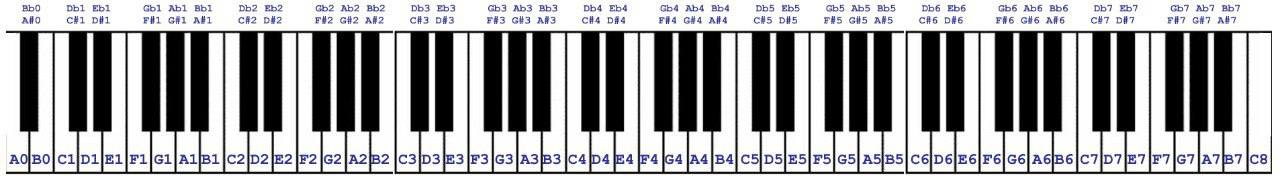

In [23]:
from PIL import Image
import IPython.display as display

image_path = "~/image/code.jpg"
image = Image.open(image_path)
display.display(image)

Каждый пакет семплов имеет следующий вид.

In [25]:
data_folder = "~/data/boesendorfer_290_imperial"
files_portraits = os.listdir(data_folder) 
df = pd.DataFrame(files_portraits, columns=['Название ноты'])
df

,Название ноты
0,B4.wav
1,F4.wav
2,C#5.wav
3,C8.wav
4,G#1.wav
...,...
83,D#7.wav
84,G3.wav
85,C4.wav
86,G4.wav


Взглянем на метаинформацию одного семпла аудио. 

In [46]:
import audio_metadata
import librosa 
from IPython.display import Audio

data = audio_metadata.load('~/data/boesendorfer_290_imperial/A#0.wav')
data

<WAVE({
    'filepath': '/home/nermakovaa/ermak/semester_3/Speech_processing/Project/data/boesendorfer_290_imperial/A#0.wav',
    'filesize': '844.14 KiB',
    'pictures': [],
    'streaminfo': <WAVEStreamInfo({
        'audio_format': <WAVEAudioFormat.PCM>,
        'bit_depth': 16,
        'bitrate': '1411 Kbps',
        'channels': 2,
        'duration': '00:05',
        'sample_rate': '44.1 KHz',
    })>,
    'tags': <RIFFTags({})>,
})>

In [47]:
data, sr = librosa.load('~/data/boesendorfer_290_imperial/A#0.wav', duration=30) 

Audio(data=data, rate=sr)

Поскольку часть данных представлена в формате .wav, а часть в формате .mp3, приведем их к одному формату. 

In [33]:
import os
from pydub import AudioSegment

def convert_to_wav(folder_path):

    file_list = os.listdir(folder_path)

    for file_name in file_list:
        if file_name.endswith(".mp3"):
            mp3_file_path = os.path.join(folder_path, file_name)
            audio = AudioSegment.from_mp3(mp3_file_path)
            
            wav_file_path = os.path.splitext(mp3_file_path)[0] + ".wav"
            audio.export(wav_file_path, format="wav")

convert_to_wav("~/data/theremin_music_uiowa_edu")
convert_to_wav("~/data/real_piano")
convert_to_wav("~/data/virtual_piano_keyboard")
convert_to_wav("~/data/www_onlinepianist_com")

In [35]:
def delete_mp3(folder_path):
    file_list_new = os.listdir(folder_path)

    for file_name in file_list_new:
        if file_name.endswith(".mp3"):
            file_path = os.path.join(folder_path, file_name)
            os.remove(file_path)

delete_mp3("~/data/theremin_music_uiowa_edu")
delete_mp3("~/data/real_piano")
delete_mp3("~/data/virtual_piano_keyboard")
delete_mp3("~/data/www_onlinepianist_com")